[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  7  3]
 [ 0  0 13]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  8  2]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[[ 7  0  0]
 [ 0  9  1]
 [ 0  1 12]]
[

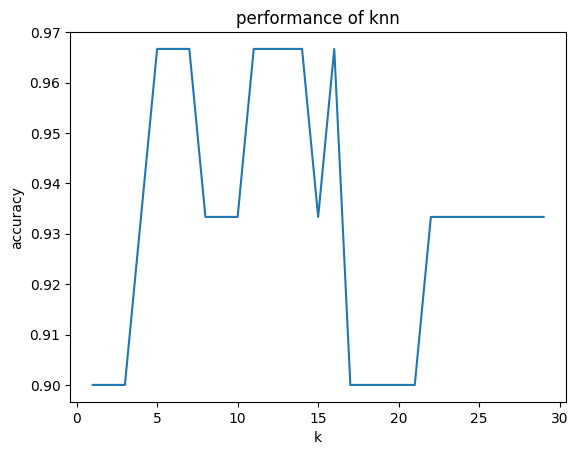

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNN:
    def __init__(self, k,dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X_test):
        neighbours = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbours.append(y_sorted[:self.k])
        return list(map(most_common,neighbours))
    def evaluate(self,X_test,y_test):
        y_pred = self.predict(X_test)
        from sklearn.metrics import accuracy_score,confusion_matrix
        cm = confusion_matrix(y_test,y_pred)
        print(cm)
        accuracy = sum(y_pred == y_test)/len(y_test)
        return accuracy
#unpack the iris dataset, from UCI machine learning repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
accuracies=[]
ks = range(1,30)
for k in ks:
    knn = KNN(k)
    knn.fit(X_train,y_train)
    accuracy = knn.evaluate(X_test,y_test)
    accuracies.append(accuracy)

fig,ax=plt.subplots()
ax.plot(ks,accuracies)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.set_title('performance of knn')
plt.show()
